In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import datetime
import matplotlib.pyplot as plt
import contextily as cx
import seaborn as sns

## 读数据

In [2]:
path = 'process data/'
df = pd.read_csv(path + 'dataset_4_raw.csv')
df

,device_id,latitude,longitude,device_home_latitude,device_home_longitude,date
0,f654d4a6-3850-4021-98df-1e4de5d5a945,22.291246,114.198296,22.378021,114.258036,2023-09-01 08:41:01
1,f654d4a6-3850-4021-98df-1e4de5d5a945,22.269249,114.240915,22.378021,114.258036,2023-09-01 15:24:05
2,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339961,114.134779,22.365877,114.136828,2023-09-03 19:00:55
3,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339928,114.134885,22.365877,114.136828,2023-09-03 19:07:21
4,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339945,114.134766,22.365877,114.136828,2023-09-03 19:13:10
...,...,...,...,...,...,...
59839133,b459657d-9ab1-4f73-9154-28f6044e2df7,22.321531,114.260227,22.321534,114.260255,2023-09-11 20:48:15
59839134,b459657d-9ab1-4f73-9154-28f6044e2df7,22.321526,114.260260,22.321534,114.260255,2023-09-11 20:53:18
59839135,b459657d-9ab1-4f73-9154-28f6044e2df7,22.321577,114.260256,22.321534,114.260255,2023-09-11 21:44:53
59839136,b4797889-7ba8-6302-2099-7fd7d0cf6e40,22.281597,114.159020,22.266985,114.234298,2023-09-03 12:55:23


In [3]:
import datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
df_15 = df[(df['date'].dt.hour >= 1) & (df['date'].dt.hour <= 5)] # 凌晨1：00至3：59的数据
df_15 = df_15[['device_id','latitude','longitude','device_home_latitude','device_home_longitude']]
df_15

,device_id,latitude,longitude,device_home_latitude,device_home_longitude
30,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326504,114.257659,22.327950,114.258985
31,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326499,114.257590,22.327950,114.258985
32,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326479,114.257576,22.327950,114.258985
40,f4a37500-1401-4766-9be9-0b7492d7066f,22.315801,114.217589,22.316722,114.217165
129,f6ec9f4b-8020-467c-be2c-df948aebe5dc,22.441668,114.072768,22.441666,114.072836
...,...,...,...,...,...
59839073,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316358,114.174779,22.316361,114.174784
59839074,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316356,114.174787,22.316361,114.174784
59839075,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316356,114.174780,22.316361,114.174784
59839076,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316359,114.174702,22.316361,114.174784


## 读取香港building shape file

In [5]:
import fiona

structure_path = 'Building_SHP/BUILDING_STRUCTURE.shp'
with fiona.open(structure_path) as f:
    shapefile = gpd.GeoDataFrame.from_features(f, crs=f.crs)
shapefile.to_crs(epsg=4326, inplace=True)
building_shp = shapefile[shapefile['BUILDING00'] == 'T']
building_shp = building_shp[['BUILDINGST', 'geometry']]
# 增加缓冲区
building_shp['geometry'] = building_shp.geometry.buffer(distance=0.0001)
building_shp

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19196\3223849686.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_shp['geometry'] = building_shp.geometry.buffer(distance=0.0001)


,BUILDINGST,geometry
0,243561,"POLYGON ((113.84081 22.21859, 113.84080 22.218..."
1,243562,"POLYGON ((113.84093 22.21873, 113.84094 22.218..."
2,243563,"POLYGON ((113.84090 22.21857, 113.84089 22.218..."
3,243564,"POLYGON ((113.84087 22.21873, 113.84087 22.218..."
4,243565,"POLYGON ((113.84100 22.21861, 113.84099 22.218..."
...,...,...
340747,403798,"POLYGON ((114.43645 22.54009, 114.43646 22.540..."
340748,4963,"POLYGON ((114.43643 22.54126, 114.43644 22.541..."
340749,4952,"POLYGON ((114.43677 22.54114, 114.43676 22.541..."
340750,5040,"POLYGON ((114.43675 22.54040, 114.43670 22.540..."


In [6]:
## 定义一个 building_lat_lon_df ，存储 建筑物的 id 和 中心点经纬度
building_lat_lon_df = pd.DataFrame(columns=['BUILDINGST', 'latitude', 'longitude'])

building_lat_lon_list = []

## 获取每个建筑物的中心点经纬度
for idx, row in building_shp.iterrows():
    if idx == 85188:
        print('已读取25%')
    elif idx == 170376:
        print('已读取50%')
    elif idx == 255564:
        print('已读取50%')
    elif idx == 340751:
        print('已读取100%')
    geometry = row['geometry']
    centroid = geometry.centroid
    lon = centroid.x
    lat = centroid.y
    
    # 存到字典
    building_lat_lon_data = {'BUILDINGST': idx, 'latitude': lat, 'longitude': lon}
    
    # 将字典添加到列表
    building_lat_lon_list.append(building_lat_lon_data)

# 使用pd.concat()方法将列表转换为DataFrame
building_lat_lon_df = pd.concat([building_lat_lon_df, pd.DataFrame(building_lat_lon_list)])

building_lat_lon_df

已读取25%
已读取50%
已读取50%
已读取100%


,BUILDINGST,latitude,longitude
0,0,22.218677,113.840892
1,1,22.218621,113.840924
2,2,22.218693,113.840934
3,3,22.218686,113.840983
4,4,22.218720,113.841003
...,...,...,...
332013,340747,22.539980,114.436365
332014,340748,22.541139,114.436365
332015,340749,22.541258,114.436660
332016,340750,22.540524,114.436728


In [7]:
building_lat_lon_df.dtypes

BUILDINGST     object
latitude      float64
longitude     float64
dtype: object

## 住址经纬度df

In [9]:
home_lat_lon_df = df_15[['device_id','device_home_latitude','device_home_longitude']]
home_lat_lon_df = home_lat_lon_df.drop_duplicates()
home_lat_lon_df

,device_id,device_home_latitude,device_home_longitude
30,f46a65f1-db93-477b-a2e6-798f09b778a3,22.327950,114.258985
40,f4a37500-1401-4766-9be9-0b7492d7066f,22.316722,114.217165
129,f6ec9f4b-8020-467c-be2c-df948aebe5dc,22.441666,114.072836
191,f6fba5cc-51ae-4552-a25c-9b6a1704e898,22.370887,114.119189
201,f7333e59-61ea-4620-b4e5-d5f15822d6d4,22.497060,114.157175
...,...,...,...
59766553,d7ceb0f7-f2fb-4f1b-a2c5-2b9d5a683384,22.315348,114.176857
59776313,cd96ef26-498e-465c-96c3-5e8a609c67da,22.449140,114.164842
59783500,d904dc0a-4764-4080-8255-61e7906f7e24,22.307973,114.257922
59818405,f3f3ac57-6bf3-47de-876d-44f1c9270617,22.427323,114.244050


In [10]:
## 转换为 GeoDataFrame
geometry = gpd.points_from_xy(home_lat_lon_df['device_home_longitude'], home_lat_lon_df['device_home_latitude'])
home_lat_lon_gdf = gpd.GeoDataFrame(home_lat_lon_df, geometry=geometry)
home_lat_lon_gdf.crs = 'EPSG:4326'
home_lat_lon_gdf = home_lat_lon_gdf.drop(['device_home_longitude','device_home_latitude'], axis=1)
home_lat_lon_gdf

,device_id,geometry
30,f46a65f1-db93-477b-a2e6-798f09b778a3,POINT (114.25899 22.32795)
40,f4a37500-1401-4766-9be9-0b7492d7066f,POINT (114.21717 22.31672)
129,f6ec9f4b-8020-467c-be2c-df948aebe5dc,POINT (114.07284 22.44167)
191,f6fba5cc-51ae-4552-a25c-9b6a1704e898,POINT (114.11919 22.37089)
201,f7333e59-61ea-4620-b4e5-d5f15822d6d4,POINT (114.15717 22.49706)
...,...,...
59766553,d7ceb0f7-f2fb-4f1b-a2c5-2b9d5a683384,POINT (114.17686 22.31535)
59776313,cd96ef26-498e-465c-96c3-5e8a609c67da,POINT (114.16484 22.44914)
59783500,d904dc0a-4764-4080-8255-61e7906f7e24,POINT (114.25792 22.30797)
59818405,f3f3ac57-6bf3-47de-876d-44f1c9270617,POINT (114.24405 22.42732)


In [11]:
## 映射到building
home_merged_gdf = gpd.sjoin(building_shp, home_lat_lon_gdf, how='inner', predicate='intersects')
# home_merged_gdf = home_merged_gdf.drop('index_right', axis=1)
home_merged_gdf

,BUILDINGST,geometry,index_right,device_id
309,196195,"POLYGON ((113.86054 22.25505, 113.86053 22.255...",832270,f1e6291b-fe99-4a10-a740-9ef529b0abaa
310,246850,"POLYGON ((113.85967 22.25511, 113.85967 22.255...",832270,f1e6291b-fe99-4a10-a740-9ef529b0abaa
310,246850,"POLYGON ((113.85967 22.25511, 113.85967 22.255...",15632974,9d84fd00-873a-4473-9c17-42bbf0402455
331,185497,"POLYGON ((113.86075 22.25491, 113.86075 22.254...",15632974,9d84fd00-873a-4473-9c17-42bbf0402455
456,186401,"POLYGON ((113.86169 22.25430, 113.86164 22.254...",12178170,7da1b9a7-3908-475e-a766-638b5d760eb7
...,...,...,...,...
339981,41770,"POLYGON ((114.35908 22.46983, 114.35908 22.469...",9352511,56de72b3-78d9-4aef-9b2a-3ed823245e4c
339986,41729,"POLYGON ((114.35898 22.46980, 114.35897 22.469...",9352511,56de72b3-78d9-4aef-9b2a-3ed823245e4c
339992,265834,"POLYGON ((114.35890 22.46990, 114.35890 22.469...",9352511,56de72b3-78d9-4aef-9b2a-3ed823245e4c
339995,41713,"POLYGON ((114.35907 22.47007, 114.35908 22.470...",9352511,56de72b3-78d9-4aef-9b2a-3ed823245e4c


In [12]:
home_building_unproc = home_merged_gdf[['device_id','BUILDINGST']]
## 计算每个 device_id 的每个 BUILDINGST 出现的次数
counts = home_building_unproc.groupby(['device_id','BUILDINGST']).size()
## 保存 device_id 和 这个BUILDINGST出现次数最多的 BUILDINGST
max_BUILDINGST = counts.groupby('device_id').idxmax().apply(lambda x: x[1])
home_building_df = pd.DataFrame({'device_id': max_BUILDINGST.index, 'BUILDINGST': max_BUILDINGST.values})
home_building_df

,device_id,BUILDINGST
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628
1,0000b42b-03f1-6be9-bf91-df48dfebb628,163805
2,000110af-768c-6abc-1068-8f00a49ab36a,183305
3,0001268a-33e0-6602-af37-799102373cfa,46381
4,0001ca98-70ec-6e99-be41-e272d9639921,144751
...,...,...
57861,fff54db6-88fe-41e7-aed1-5285466736aa,137098
57862,fff7e529-4fbf-443b-a898-5d5b46a0538a,165884
57863,fff894d6-9c6f-4bd2-92f3-77c135c96069,156165
57864,fffa70b5-2607-44de-a708-57a945ef9099,155936


## 位置经纬度df

In [15]:
location_lat_lon_df = df_15[['device_id','latitude','longitude']]
location_lat_lon_df

,device_id,latitude,longitude
30,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326504,114.257659
31,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326499,114.257590
32,f46a65f1-db93-477b-a2e6-798f09b778a3,22.326479,114.257576
40,f4a37500-1401-4766-9be9-0b7492d7066f,22.315801,114.217589
129,f6ec9f4b-8020-467c-be2c-df948aebe5dc,22.441668,114.072768
...,...,...,...
59839073,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316358,114.174779
59839074,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316356,114.174787
59839075,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316356,114.174780
59839076,b56a2980-91b2-415d-945f-8a445d5bbe60,22.316359,114.174702


In [16]:
## 转换为 GeoDataFrame
geometry = gpd.points_from_xy(location_lat_lon_df['longitude'], location_lat_lon_df['latitude'])
location_lat_lon_gdf = gpd.GeoDataFrame(location_lat_lon_df, geometry=geometry)
location_lat_lon_gdf.crs = 'EPSG:4326'
location_lat_lon_gdf = location_lat_lon_gdf.drop(['longitude','latitude'], axis=1)
location_lat_lon_gdf

,device_id,geometry
30,f46a65f1-db93-477b-a2e6-798f09b778a3,POINT (114.25766 22.32650)
31,f46a65f1-db93-477b-a2e6-798f09b778a3,POINT (114.25759 22.32650)
32,f46a65f1-db93-477b-a2e6-798f09b778a3,POINT (114.25758 22.32648)
40,f4a37500-1401-4766-9be9-0b7492d7066f,POINT (114.21759 22.31580)
129,f6ec9f4b-8020-467c-be2c-df948aebe5dc,POINT (114.07277 22.44167)
...,...,...
59839073,b56a2980-91b2-415d-945f-8a445d5bbe60,POINT (114.17478 22.31636)
59839074,b56a2980-91b2-415d-945f-8a445d5bbe60,POINT (114.17479 22.31636)
59839075,b56a2980-91b2-415d-945f-8a445d5bbe60,POINT (114.17478 22.31636)
59839076,b56a2980-91b2-415d-945f-8a445d5bbe60,POINT (114.17470 22.31636)


In [17]:
## 映射到building
location_merged_gdf = gpd.sjoin(building_shp, location_lat_lon_gdf, how='inner', predicate='intersects')
# location_merged_gdf = location_merged_gdf.drop('index_right', axis=1)
location_merged_gdf

,BUILDINGST,geometry,index_right,device_id
269,196166,"POLYGON ((113.85826 22.25531, 113.85826 22.255...",33927554,8a185e38-bfb5-48cb-bcfe-7a3c4accf2c4
270,196167,"POLYGON ((113.85836 22.25517, 113.85835 22.255...",33927554,8a185e38-bfb5-48cb-bcfe-7a3c4accf2c4
271,196171,"POLYGON ((113.85857 22.25524, 113.85857 22.255...",33927554,8a185e38-bfb5-48cb-bcfe-7a3c4accf2c4
274,196175,"POLYGON ((113.85845 22.25517, 113.85844 22.255...",33927554,8a185e38-bfb5-48cb-bcfe-7a3c4accf2c4
275,196180,"POLYGON ((113.85868 22.25522, 113.85867 22.255...",33927554,8a185e38-bfb5-48cb-bcfe-7a3c4accf2c4
...,...,...,...,...
340507,403663,"POLYGON ((114.37123 22.39683, 114.37122 22.396...",45170012,a1e7e28b-0092-4559-8c0d-a51b8f1af93f
340506,87520,"POLYGON ((114.37143 22.39677, 114.37142 22.396...",45170014,a1e7e28b-0092-4559-8c0d-a51b8f1af93f
340507,403663,"POLYGON ((114.37123 22.39683, 114.37122 22.396...",45170014,a1e7e28b-0092-4559-8c0d-a51b8f1af93f
340506,87520,"POLYGON ((114.37143 22.39677, 114.37142 22.396...",45170013,a1e7e28b-0092-4559-8c0d-a51b8f1af93f


In [20]:
location_building_unproc = location_merged_gdf[['device_id','BUILDINGST']]
## 计算每个 device_id 的每个 BUILDINGST 出现的次数
counts = location_building_unproc.groupby(['device_id','BUILDINGST']).size()
## 保存 device_id 和 这个BUILDINGST出现次数最多的 BUILDINGST
max_BUILDINGST = counts.groupby('device_id').idxmax().apply(lambda x: x[1])
location_building_pred_df = pd.DataFrame({'device_id': max_BUILDINGST.index, 'BUILDINGST': max_BUILDINGST.values})
location_building_pred_df

,device_id,BUILDINGST
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628
1,0000b42b-03f1-6be9-bf91-df48dfebb628,163805
2,000110af-768c-6abc-1068-8f00a49ab36a,183305
3,0001268a-33e0-6602-af37-799102373cfa,46381
4,00014c23-de85-4a31-b189-6627f324a6d1,181471
...,...,...
81307,fffa70b5-2607-44de-a708-57a945ef9099,155936
81308,fffc5a1f-54c7-46f3-a748-4f05fde20c92,159743
81309,fffcec3a-6fed-4aba-870a-de9417a1bf25,166486
81310,fffd6e85-73be-4196-bd88-373dced6dcc9,179407


## 验证

###### 先通过 device_id 关联 home_building_df 和 location_building_pred_df ，得到 device_id ，BUILDINGST_home 和 BUILDINGST_location ，然后分别与 building_lat_lon_df 的 BUILDINGST 关联，得到 BUILDINGST_home 和 BUILDINGST_location 的经纬度，然后使用 geod.geometry_length(line_string) 计算 BUILDINGST_home 和 BUILDINGST_location 之间的距离。

In [21]:
home_building_df = home_building_df.rename(columns = {'BUILDINGST': 'BUILDINGST_home'})
home_building_df

,device_id,BUILDINGST_home
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628
1,0000b42b-03f1-6be9-bf91-df48dfebb628,163805
2,000110af-768c-6abc-1068-8f00a49ab36a,183305
3,0001268a-33e0-6602-af37-799102373cfa,46381
4,0001ca98-70ec-6e99-be41-e272d9639921,144751
...,...,...
57861,fff54db6-88fe-41e7-aed1-5285466736aa,137098
57862,fff7e529-4fbf-443b-a898-5d5b46a0538a,165884
57863,fff894d6-9c6f-4bd2-92f3-77c135c96069,156165
57864,fffa70b5-2607-44de-a708-57a945ef9099,155936


In [22]:
location_building_pred_df = location_building_pred_df.rename(columns = {'BUILDINGST': 'BUILDINGST_location'})
location_building_pred_df

,device_id,BUILDINGST_location
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628
1,0000b42b-03f1-6be9-bf91-df48dfebb628,163805
2,000110af-768c-6abc-1068-8f00a49ab36a,183305
3,0001268a-33e0-6602-af37-799102373cfa,46381
4,00014c23-de85-4a31-b189-6627f324a6d1,181471
...,...,...
81307,fffa70b5-2607-44de-a708-57a945ef9099,155936
81308,fffc5a1f-54c7-46f3-a748-4f05fde20c92,159743
81309,fffcec3a-6fed-4aba-870a-de9417a1bf25,166486
81310,fffd6e85-73be-4196-bd88-373dced6dcc9,179407


In [23]:
## 关联 home_building_df 和 location_building_pred_df
merged_df = home_building_df.merge(location_building_pred_df, on='device_id', how='inner')
merged_df

,device_id,BUILDINGST_home,BUILDINGST_location
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628,82628
1,0000b42b-03f1-6be9-bf91-df48dfebb628,163805,163805
2,000110af-768c-6abc-1068-8f00a49ab36a,183305,183305
3,0001268a-33e0-6602-af37-799102373cfa,46381,46381
4,0001ca98-70ec-6e99-be41-e272d9639921,144751,144751
...,...,...,...
57319,fff54db6-88fe-41e7-aed1-5285466736aa,137098,133577
57320,fff7e529-4fbf-443b-a898-5d5b46a0538a,165884,165884
57321,fff894d6-9c6f-4bd2-92f3-77c135c96069,156165,169624
57322,fffa70b5-2607-44de-a708-57a945ef9099,155936,155936


In [25]:
## 关联 home 的 经纬度
merged_home_df = merged_df.merge(building_lat_lon_df, left_on='BUILDINGST_home', right_on='BUILDINGST')
merged_home_df = merged_home_df.drop(['BUILDINGST_home','BUILDINGST'], axis=1)
merged_home_df = merged_home_df.rename(columns = {'latitude': 'latitude_home', 'longitude': 'longitude_home'})
merged_home_df

,device_id,BUILDINGST_location,latitude_home,longitude_home
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,82628,22.452349,114.036279
1,3585f758-0852-4d50-a527-fcbfdb653a93,82628,22.452349,114.036279
2,3be8e153-a712-44d7-9088-11a417706150,144634,22.452349,114.036279
3,410640ab-f99e-451c-89dc-3a8652e4e338,82628,22.452349,114.036279
4,5581b0ab-773d-4ecf-a12a-5ed64658e0a7,82628,22.452349,114.036279
...,...,...,...,...
51890,ffd0a7cb-f62d-4816-8091-1ef14fc25210,230147,22.423614,114.162573
51891,ffead1c2-e54b-4f0a-a247-8a0e42fe199b,376508,22.205084,114.028769
51892,ffeaeab0-f60c-6df9-a241-88f39db623f6,150644,22.508499,114.102043
51893,fff3a9c3-3d02-4cef-9b92-b2c5d494525e,5038,22.228155,113.927768


In [26]:
## 关联 location 的 经纬度
merged_lat_lon_df = merged_home_df.merge(building_lat_lon_df, left_on='BUILDINGST_location', right_on='BUILDINGST')
merged_lat_lon_df = merged_lat_lon_df.drop(['BUILDINGST_location','BUILDINGST'], axis=1)
merged_lat_lon_df = merged_lat_lon_df.rename(columns = {'latitude': 'latitude_location', 'longitude': 'longitude_location'})
merged_lat_lon_df

,device_id,latitude_home,longitude_home,latitude_location,longitude_location
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,22.452349,114.036279,22.452349,114.036279
1,3585f758-0852-4d50-a527-fcbfdb653a93,22.452349,114.036279,22.452349,114.036279
2,410640ab-f99e-451c-89dc-3a8652e4e338,22.452349,114.036279,22.452349,114.036279
3,5581b0ab-773d-4ecf-a12a-5ed64658e0a7,22.452349,114.036279,22.452349,114.036279
4,802c172f-ee5e-4af7-83cf-f81369b96d39,22.452349,114.036279,22.452349,114.036279
...,...,...,...,...,...
50587,ffcb8ecd-9a2b-40a5-b3e7-b18ce60e7bc6,22.445046,114.009204,22.443145,114.009445
50588,ffd0a7cb-f62d-4816-8091-1ef14fc25210,22.423614,114.162573,22.423614,114.162573
50589,ffeaeab0-f60c-6df9-a241-88f39db623f6,22.508499,114.102043,22.424367,114.102070
50590,fff3a9c3-3d02-4cef-9b92-b2c5d494525e,22.228155,113.927768,22.276455,113.927715


In [27]:
## 计算距离

# from pyproj import Geod
# from shapely.geometry import Point, LineString, Polygon
from geopy.distance import geodesic
distances = []

## 计算距离
for index, row in merged_lat_lon_df.iterrows():
    home_point = (row['latitude_home'], row['longitude_home'])
    location_point = (row['latitude_location'], row['longitude_location'])
#     line_string = LineString([home_point, location_point])
#     geod = Geod(ellps="WGS84")
#     distance = geod.geometry_length(line_string)
    distance = geodesic(home_point, location_point).meters
    distances.append(distance)

merged_lat_lon_df['distance'] = distances
merged_lat_lon_df

,device_id,latitude_home,longitude_home,latitude_location,longitude_location,distance
0,00000f8e-3fca-60b8-10b1-d27413b0cf19,22.452349,114.036279,22.452349,114.036279,0.000000
1,3585f758-0852-4d50-a527-fcbfdb653a93,22.452349,114.036279,22.452349,114.036279,0.000000
2,410640ab-f99e-451c-89dc-3a8652e4e338,22.452349,114.036279,22.452349,114.036279,0.000000
3,5581b0ab-773d-4ecf-a12a-5ed64658e0a7,22.452349,114.036279,22.452349,114.036279,0.000000
4,802c172f-ee5e-4af7-83cf-f81369b96d39,22.452349,114.036279,22.452349,114.036279,0.000000
...,...,...,...,...,...,...
50587,ffcb8ecd-9a2b-40a5-b3e7-b18ce60e7bc6,22.445046,114.009204,22.443145,114.009445,211.941103
50588,ffd0a7cb-f62d-4816-8091-1ef14fc25210,22.423614,114.162573,22.423614,114.162573,0.000000
50589,ffeaeab0-f60c-6df9-a241-88f39db623f6,22.508499,114.102043,22.424367,114.102070,9316.483982
50590,fff3a9c3-3d02-4cef-9b92-b2c5d494525e,22.228155,113.927768,22.276455,113.927715,5348.369945


In [28]:
counts = merged_lat_lon_df['distance'].value_counts().sort_index() 
counts

0.000000        35477
3.722904            1
4.129014            1
4.275651            1
4.595226            1
                ...  
42128.376244        1
42446.640895        1
42518.189945        2
42559.684335        1
53631.567669        1
Name: distance, Length: 13184, dtype: int64

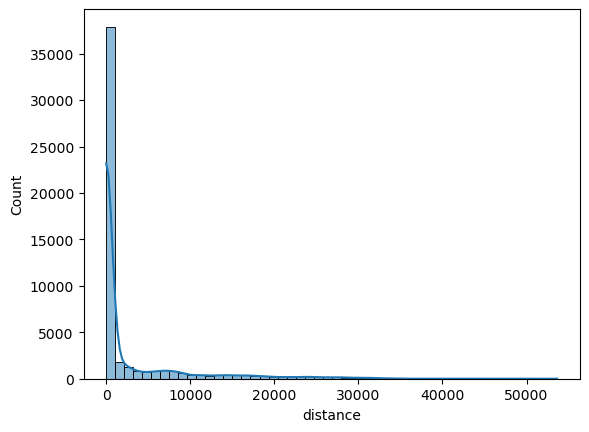

In [29]:
d = merged_lat_lon_df['distance']
sns.histplot(d,kde=True,bins=50)
plt.show()

<Axes: xlabel='distance', ylabel='Proportion'>

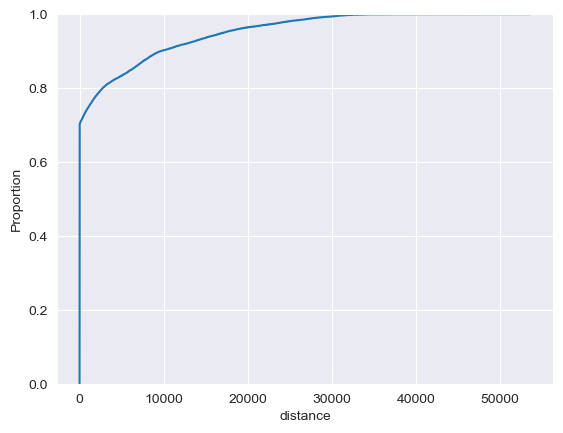

In [36]:
sns.set_style('darkgrid')
sns.ecdfplot(d)